In [30]:
import pickle
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt# for Plotting graphs
import seaborn as sns# same as matplotlib but to make life easier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('https://raw.githubusercontent.com/DiahDSyntia/datamining-tugasakhir/main/indian_liver_patient.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [31]:
#loading the dataset
df=pd.read_csv("https://raw.githubusercontent.com/DiahDSyntia/datamining-tugasakhir/main/indian_liver_patient.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [32]:
#describing the data
df.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,0.758204,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,1.284974
std,16.221786,0.428542,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [33]:
#printing the shape of data
print(df.shape)
df.info()

(579, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         579 non-null    int64  
 1   Gender                      579 non-null    int64  
 2   Total_Bilirubin             579 non-null    float64
 3   Direct_Bilirubin            579 non-null    float64
 4   Alkaline_Phosphotase        579 non-null    int64  
 5   Alamine_Aminotransferase    579 non-null    int64  
 6   Aspartate_Aminotransferase  579 non-null    int64  
 7   Total_Protiens              579 non-null    float64
 8   Albumin                     579 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     579 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 49.9 KB


In [34]:
#encoding the Gender attribute
df['Gender'].replace({'Male':1,'Female':0},inplace=True)

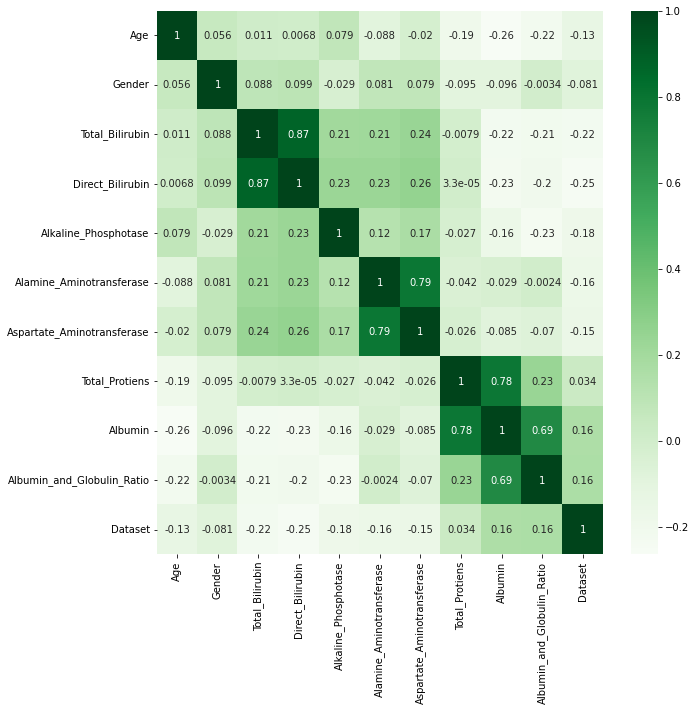

In [35]:
#plotting Correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='Greens',annot=True)

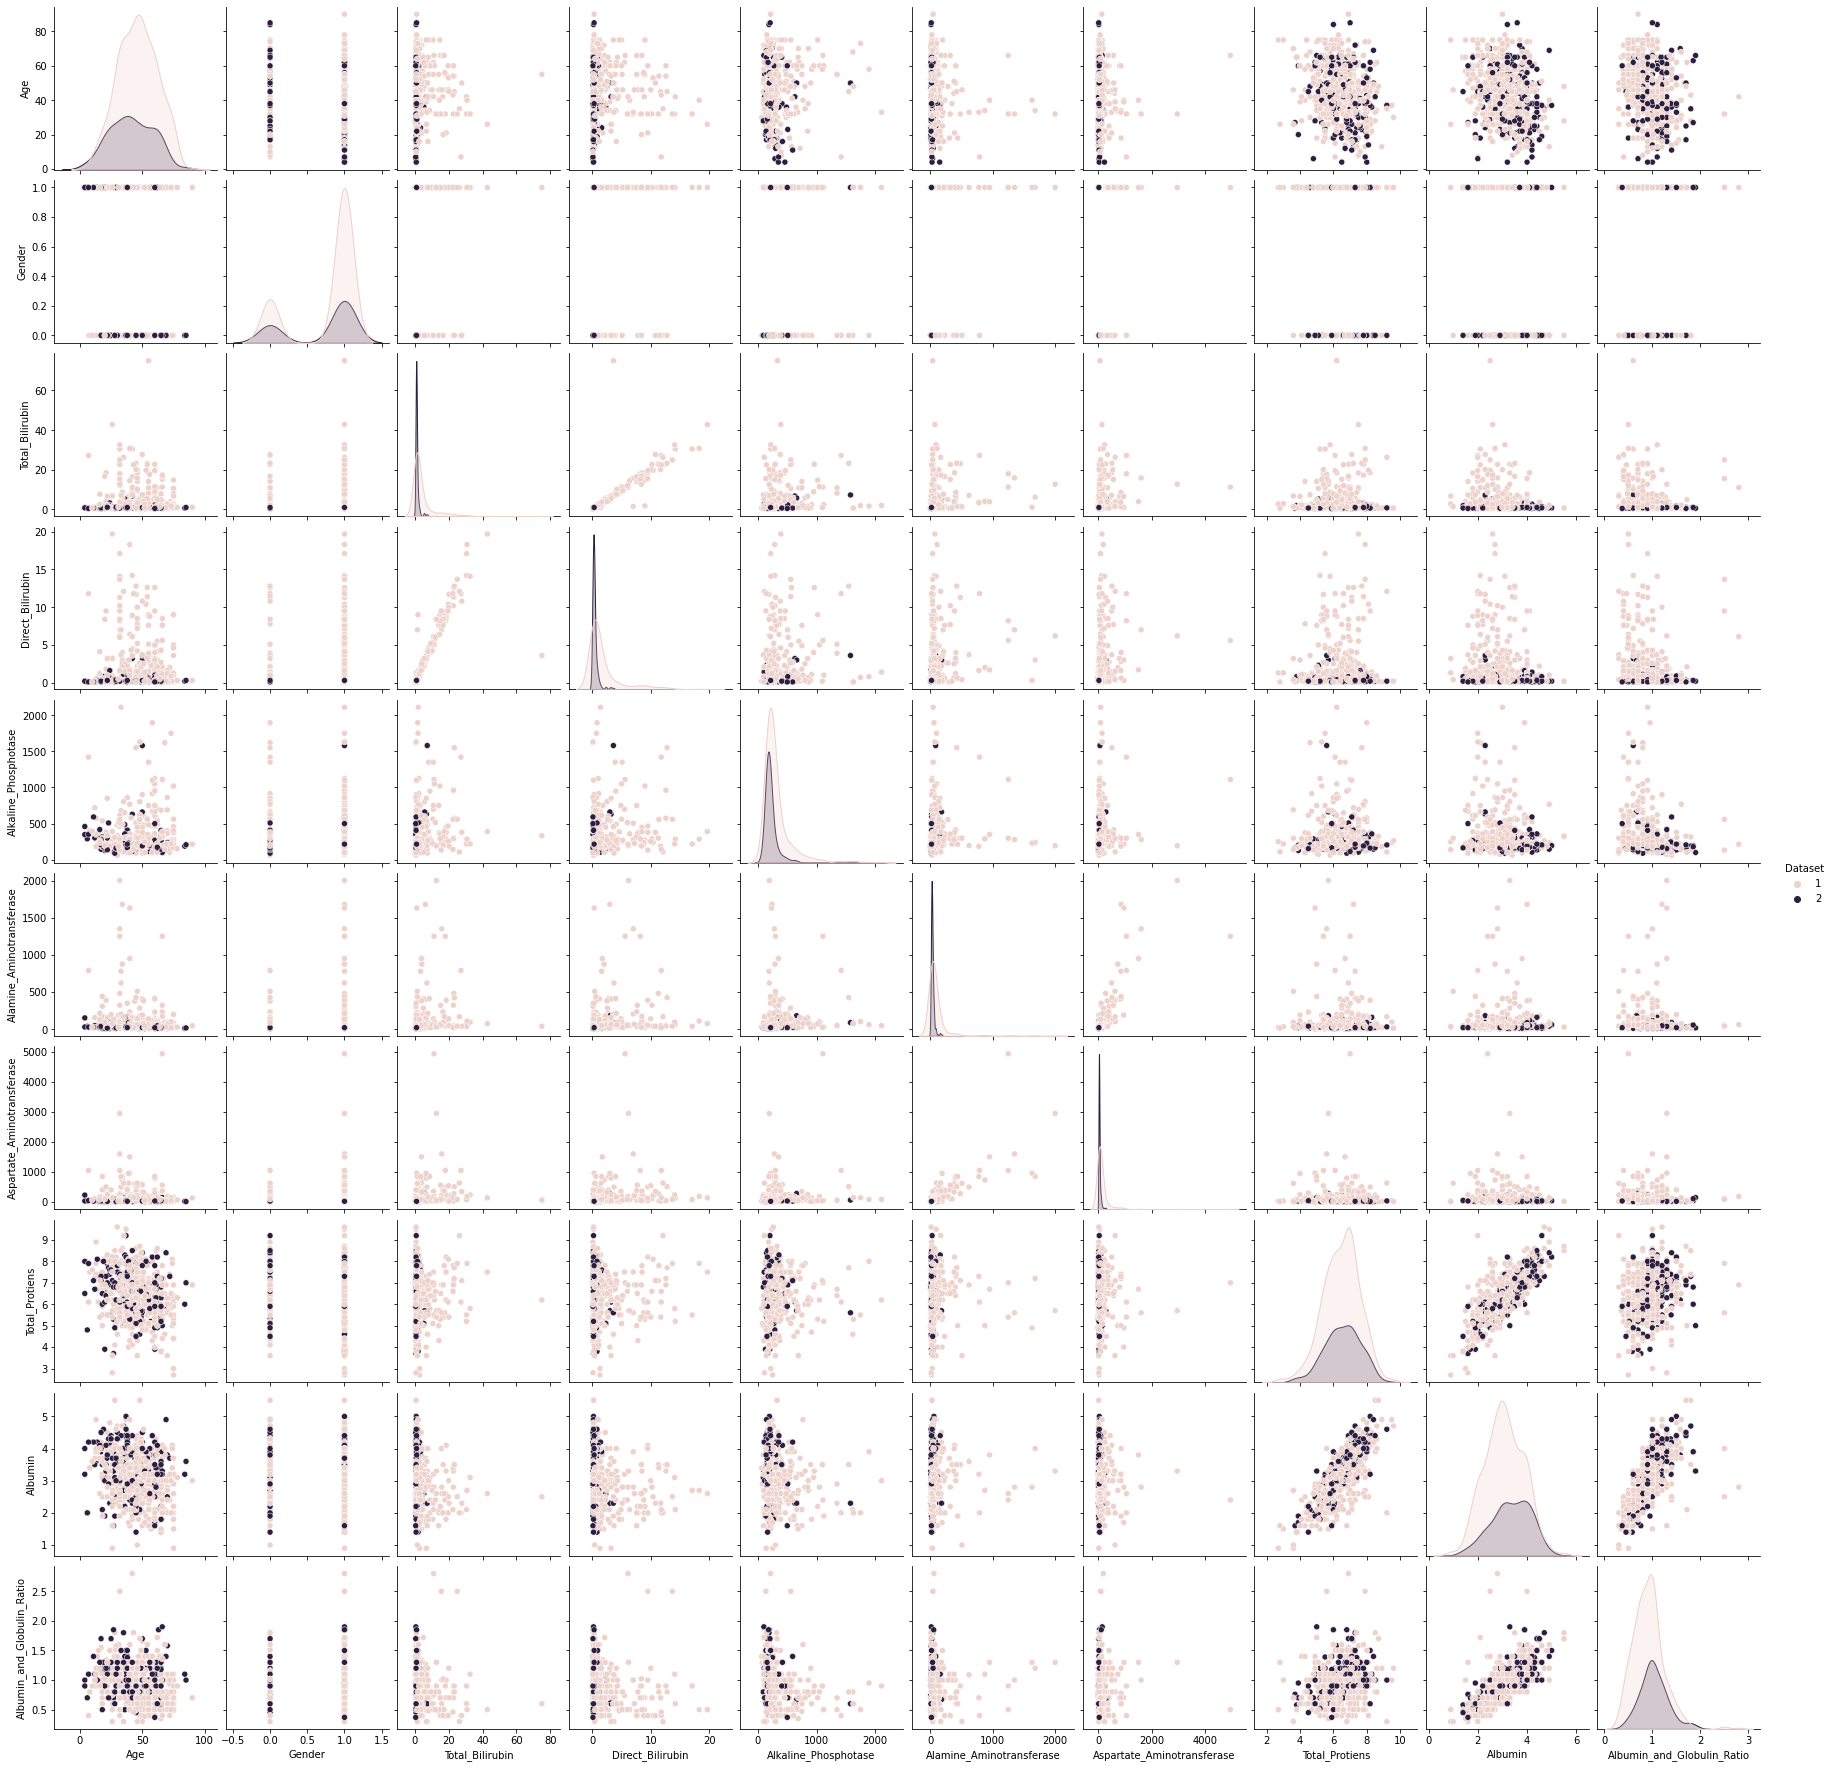

In [36]:
sns.pairplot(df, hue='Dataset')

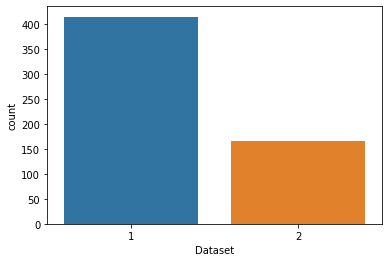

In [37]:
# visualize number of patients diagonised with liver diesease
sns.countplot(data = df, x = 'Dataset');

Text(0.5, 0, 'Patient Condition')

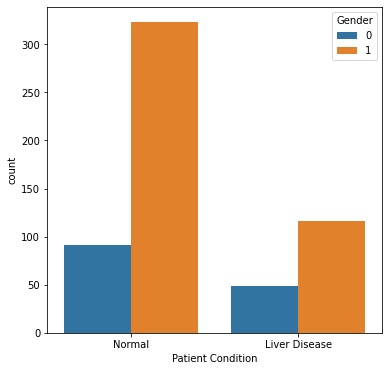

In [38]:
#Visualizing data with liver disease along with Gender
plt.figure(figsize=(6,6))
ax = sns.countplot(x = df['Dataset'].apply(lambda x:'Normal' if x == 1 else 'Liver Disease'), hue=df['Gender'])
ax.set_xlabel('Patient Condition')

In [39]:
#checking for missing values as per column
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [40]:
#checking the rows with the missing values
df[df['Albumin_and_Globulin_Ratio'].isna()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset


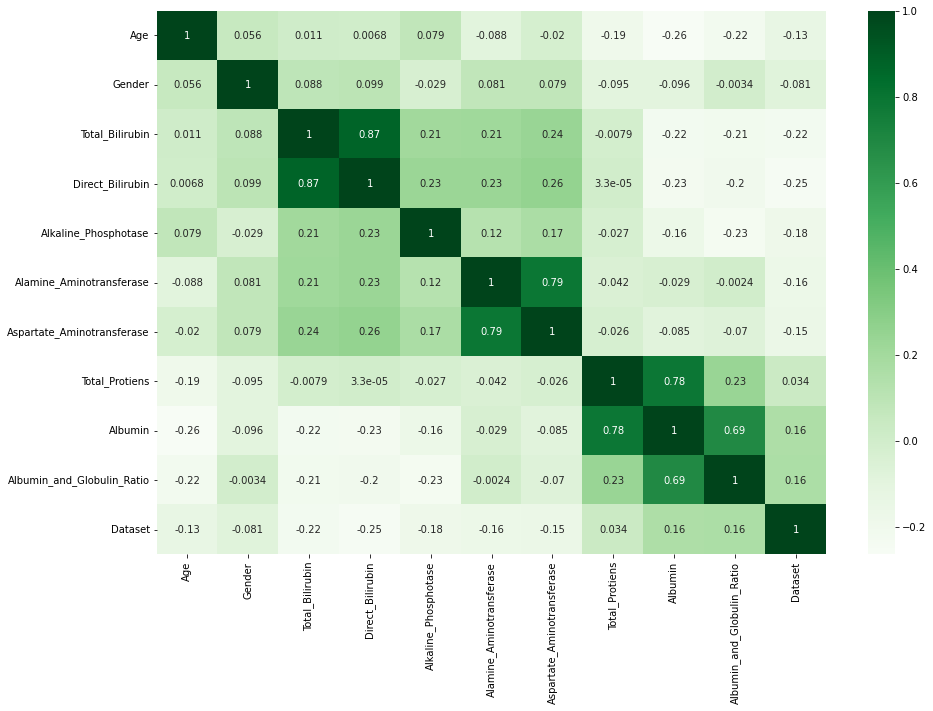

In [41]:
#Lets have a look for correlation of Albumin_and_Globulin_Ratio with other columns
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='Greens',annot=True)

In [42]:
#As seen above Albumin_and_Globulin_Ratio is highly correlated with Albumin
# we apply binning to Albumin and will fill the values in Albumin_and_Globulin_Ratio using median of the bin value
df["binned_Albumin"]=pd.cut(df['Albumin'],bins=10,labels=list(range(10)))
#checking the rows with the missing values
df[df['Albumin_and_Globulin_Ratio'].isna()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,binned_Albumin


In [43]:
#seprating dataframe as per bins of missing data
df_bin6=df[df['binned_Albumin']==6]
df_bin4=df[df['binned_Albumin']==4]
df_bin3=df[df['binned_Albumin']==3]
df_bin8=df[df['binned_Albumin']==8]

In [44]:
#filling na values for bin 6
df_bin6['Albumin_and_Globulin_Ratio'].fillna(df_bin6['Albumin_and_Globulin_Ratio'].median(),inplace=True)
print("Median for Albumin Globumin Ratio for bin 6: ",df_bin6['Albumin_and_Globulin_Ratio'].median())
#adding the replaced values
df.drop(df[df['binned_Albumin']==6].index, inplace = True)
df=df.append(df_bin6,ignore_index=True)

#filling na values for bin 4
df_bin4['Albumin_and_Globulin_Ratio'].fillna(df_bin4['Albumin_and_Globulin_Ratio'].median(),inplace=True)
print("Median for Albumin Globumin Ratio for bin 4: ",df_bin4['Albumin_and_Globulin_Ratio'].median())
#adding the replaced values
df.drop(df[df['binned_Albumin']==4].index, inplace = True)
df=df.append(df_bin4,ignore_index=True)

#filling na values for bin 3
df_bin3['Albumin_and_Globulin_Ratio'].fillna(df_bin3['Albumin_and_Globulin_Ratio'].median(),inplace=True)
print("Median for Albumin Globumin Ratio for bin 3: ",df_bin3['Albumin_and_Globulin_Ratio'].median())
#adding the replaced values
df.drop(df[df['binned_Albumin']==3].index, inplace = True)
df=df.append(df_bin3,ignore_index=True)

#filling na values for bin 8
df_bin8['Albumin_and_Globulin_Ratio'].fillna(df_bin8['Albumin_and_Globulin_Ratio'].median(),inplace=True)
print("Median for Albumin Globumin Ratio for bin 8: ",df_bin8['Albumin_and_Globulin_Ratio'].median())
#adding the replaced values
df.drop(df[df['binned_Albumin']==8].index, inplace = True)
df= df.append(df_bin8,ignore_index=True)
#Printing Shape of Dataset
print(df.shape)

Median for Albumin Globumin Ratio for bin 6:  1.1
Median for Albumin Globumin Ratio for bin 4:  0.9
Median for Albumin Globumin Ratio for bin 3:  0.8
Median for Albumin Globumin Ratio for bin 8:  1.3
(579, 12)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inpla

In [45]:
#remove the binned albumin column
df.drop(columns=['binned_Albumin'], inplace=True)

In [46]:
#Scaling the dataset using Min Max scaler:
#Getting Numerical Columns
cols=df.columns.to_list()
cols.remove('Gender')
cols.remove('Dataset')
print("Columns with numerical data:")
cols

Columns with numerical data:


['Age',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Protiens',
 'Albumin',
 'Albumin_and_Globulin_Ratio']

In [47]:
#getting Numerical columns:
df_numerical=df[cols]

#starting scaling process:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_numerical)
scaled=scaler.transform(df_numerical) #the variable scaled will be in numpy array 
x=pd.DataFrame(scaled, columns=cols) #converting the variable to dataframe.
x['Gender']=df['Gender']# adding Gender to X or attribute list
y=df['Dataset']# Getting the labels
x

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender
0,0.709302,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240,0
1,0.674419,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,1
2,0.674419,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,1
3,0.627907,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,1
4,0.488372,0.018767,0.030612,0.070835,0.004523,0.000813,0.710145,0.760870,0.400,1
...,...,...,...,...,...,...,...,...,...,...
574,0.755814,0.005362,0.005102,0.040547,0.016080,0.012198,0.826087,0.869565,0.440,0
575,0.290698,0.004021,0.005102,0.049829,0.022613,0.015654,0.695652,0.804348,0.512,1
576,0.232558,0.008043,0.005102,0.061553,0.021106,0.004269,0.768116,0.847826,0.480,1
577,0.383721,0.005362,0.005102,0.069370,0.010553,0.005286,0.942029,0.804348,0.280,0


In [48]:
#moving for feature selection
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(x, y)
print("Showing feature importance values")
print(clf.feature_importances_) 

Showing feature importance values
[0.12087358 0.10693257 0.10592919 0.12582741 0.1104484  0.11560071
 0.09099923 0.10135261 0.09888644 0.02314985]


In [49]:
model=SelectFromModel(clf, prefit=True) #getting features from  the above classifer as per the importances
cols=x.columns.to_list()#getting list of columns
tf=model.get_support()#getting which features are important
selectedcols=[]
for i in range(len(cols)):
    if tf[i]:
        selectedcols.append(cols[i])
print("showing selected columns")
print(selectedcols)
#converting the data
X_new = model.transform(x)
X_new.shape 

showing selected columns
['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Albumin']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(579, 7)

In [50]:
#splitting the dataset for Training and testing and using 5-fold Cross validation.
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.get_n_splits(X_new)

#making a comparative study of 3 different ML Algorithms namely SVM, Random Forest, KNN
#metrics for SVM
SVM_accuracy=[]
SVM_precision=[]
SVM_recall=[]
SVM_f1_score=[]

#metrics for Random Forest
RF_accuracy=[]
RF_precision=[]
RF_recall=[]
RF_f1_score=[]

#metrics for KNN
KNN_accuracy=[]
KNN_precision=[]
KNN_recall=[]
KNN_f1_score=[]

In [51]:
#initializing the models
#importing libraries of the selected algorithms
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#importing libraries of performance Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#Making the classifier Objects
clf_svm=SVC() #SVM object
clf_rf=RandomForestClassifier(max_depth=5, random_state=0)#Random Forest Object
clf_knn = KNeighborsClassifier(n_neighbors=3)#KNN object

In [52]:
i=1# count the number of folds
#starting the 5 fold cross valivation
for train_index, test_index in kf.split(X_new):
    print("%d Number of fold"%i)
    i+=1
    #Splitting the data
    X_train, X_test = X_new[train_index], X_new[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    #Training and Evaluating SVM
    model=clf_svm.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    SVM_accuracy.append(accuracy_score(y_test,y_pred))
    SVM_precision.append(precision_score(y_test,y_pred))
    SVM_recall.append(recall_score(y_test,y_pred))
    SVM_f1_score.append(f1_score(y_test,y_pred))
    #Training and Evaluating Random Forest
    model=clf_rf.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    RF_accuracy.append(accuracy_score(y_test,y_pred))
    RF_precision.append(precision_score(y_test,y_pred))
    RF_recall.append(recall_score(y_test,y_pred))
    RF_f1_score.append(f1_score(y_test,y_pred))
    
    #Training and Evaluating KNN
    model=clf_knn.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    KNN_accuracy.append(accuracy_score(y_test,y_pred))
    KNN_precision.append(precision_score(y_test,y_pred))
    KNN_recall.append(recall_score(y_test,y_pred))
    KNN_f1_score.append(f1_score(y_test,y_pred))

1 Number of fold
2 Number of fold
3 Number of fold
4 Number of fold
5 Number of fold


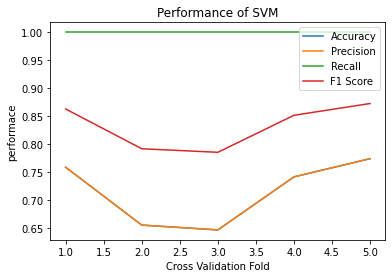

In [53]:
#visualizing results of SVM per fold
x=list(range(1,6))
plt.plot(x,SVM_accuracy,label='Accuracy')
plt.plot(x,SVM_precision,label='Precision')
plt.plot(x,SVM_recall, label='Recall')
plt.plot(x,SVM_f1_score,label='F1 Score')
plt.title("Performance of SVM")
plt.legend()
plt.xlabel("Cross Validation Fold")
plt.ylabel("performace")
plt.show()

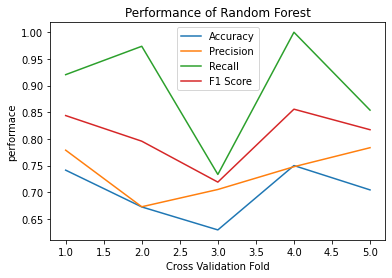

In [54]:
#visualizing results of Random Forest per fold
plt.plot(x,RF_accuracy,label='Accuracy')
plt.plot(x,RF_precision,label='Precision')
plt.plot(x,RF_recall, label='Recall')
plt.plot(x,RF_f1_score,label='F1 Score')
plt.title("Performance of Random Forest")
plt.xlabel("Cross Validation Fold")
plt.ylabel("performace")
plt.legend()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

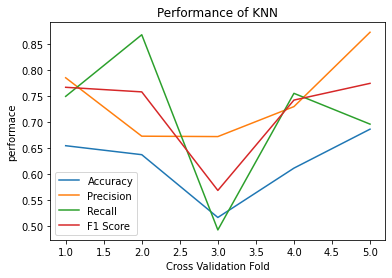

In [55]:
#visualizing results of KNN per epoch
x=list(range(1,6))
plt.plot(x,KNN_accuracy,label='Accuracy')
plt.plot(x,KNN_precision,label='Precision')
plt.plot(x,KNN_recall, label='Recall')
plt.plot(x,KNN_f1_score,label='F1 Score')
plt.title("Performance of KNN")
plt.xlabel("Cross Validation Fold")
plt.ylabel("performace")
plt.legend()
plt.show

In [56]:
#visualizing average results:
SVM=["SVM ", (sum(SVM_accuracy)/len(SVM_accuracy)), (sum(SVM_precision)/len(SVM_precision)), 
     (sum(SVM_recall)/len(SVM_recall)), (sum(SVM_f1_score)/len(SVM_f1_score))]

RF=["RF ", (sum(RF_accuracy)/len(RF_accuracy)), (sum(RF_precision)/len(RF_precision)), 
     (sum(RF_recall)/len(RF_recall)), (sum(RF_f1_score)/len(RF_f1_score))]

KNN=["KNN ", (sum(KNN_accuracy)/len(KNN_accuracy)), (sum(KNN_precision)/len(KNN_precision)), 
     (sum(KNN_recall)/len(KNN_recall)), (sum(KNN_f1_score)/len(KNN_f1_score))]
data=[]
data.append(SVM)
data.append(RF)
data.append(KNN)
#converting results to dataframe
results=pd.DataFrame(data,columns=["Algorithms","Accuracy", "Precision", "Recall", "F1 Score"])
results

,Algorithms,Accuracy,Precision,Recall,F1 Score
0,SVM,0.715127,0.715127,1.000000,0.832757
1,RF,0.699490,0.737607,0.896281,0.806266
2,KNN,0.621874,0.747097,0.712840,0.722630


In [57]:
pickle.dump(clf, open('pickleflask', 'wb'))